# Optimización de la superficie total de un contenedor de café de $\frac{1}{2}$ litro de capacidad

Una empresa que vende café en grano desea diseñar un contenedor cilíndrico con tapa cuyo volumen sea de $\frac{1}{2}$ litro. El material seleccionado para fabricar dicho envase cuesta $\$0.01$ por cm$^2$. ¿Cuáles deben ser las dimensiones de modo que la superficie del contenedor sea mínima?, ¿cuál es la superficie mínima? y ¿cuánto será el costo por contenedor fabricado?

## Objetivos

**1.1 Objetivo general**
   - *Encontrar la superficie mínima necesaria de un contenedor cilíndrico de 0.5 L de volúmen total para minimizar los gastos de producción de dicho envase.*
    
**1.2 Objetivos específicos**
   - *Encontrar los parámetros de los cuales depende la superficie del contenedor.*
   - *Deducir la función que modele con claridad la superficie del cilindro.*
   - *Optimizar de manera precisa la función de la superficie del contenedor.*
   - *Obtener los valores de los parámetros necesarios para obtener la      superficie mínima del envase.*
   - *Calcular el precio total del contenedor cilíndrico.*

**Obtención del modelo**

<img style="float: left; margin: 30px 30px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e1/Cylinder_geometry.svg/389px-Cylinder_geometry.svg.png" width="80px" height="10px" />

Se comienza asignándole variables a los parámetros correspondientes a la altura del cilindro $(h)$ y al radio de su base/tapa circular $(r)$ como se muestra en la figura de la izquierda. 

Tomando en cuenta la restricción de volumen dada, se transforman sus unidades de litros a unidades de cm$^3$, empleando la conversión $1L=1000$ cm$^3$:

$$
V=(0.5L) (\frac{1000cm^3}{1L}) \rightarrow V=500cm^3
$$

<img style ="float: left; margin: 0px 30px 15px 15px;" src="Cylindertemplate.png" width = "200px"/> 

Para formular la función que describa al volumen, es necesario expresar primeramente la superficie de la base  
($S_{base}$), correspondiente al área de un círculo:

$$
S_{base}=\pi r^2.
$$

Una vez obtenido este dato, basta con multiplicarlo por la altura para calcular el volumen del cilindro:

$$
V=hS_{base} \rightarrow 500cm^3=h\pi r^2.
$$

Se despeja '$h$', para dejarla en términos de la variable '$r$':

$$
500cm^3=h\pi r^2 \rightarrow h=\frac{500cm^3}{\pi r^2}.
$$

Continuando con el planteamiento de la función a optimizar, se busca una expresión que represente la superficie total del contenedor cilíndrico ($S_{total}$), la cual está compuesta por la suma de la superficie de la pared ($S_{pared}$) y de las bases ($S_{bases}$), es decir, de la base y la tapa:

$$
S_{total}=S_{bases}+S_{pared}.
$$

La superficie de las bases es el doble de la supercicie de la base utilizada anteriomente:

$$
S_{bases}=2S_{base} \rightarrow S_{bases}=2\pi r^2,
$$

mientras que la de la pared se calcula como el área de un rectángulo de lados $2\pi r$ y $h$:

$$
S_{pared}=2\pi rh.
$$

En esta última expresión se sustituye la '$h$' despejada y se simplifica:

$$
S_{pared}=2\pi rh=2\pi r(\frac{500cm^3}{\pi r^2}) \rightarrow S_{pared}=\frac{1000cm^3}{r}.
$$

Finalmente, se suman la superficie de las bases y de la pared para obtener la función de superficie total del contenedor cilíndrico a optimizar:

$$
S_{total}=S_{bases}+S_{pared} \rightarrow S_{total}=2\pi r^2+\frac{1000cm^3}{r}.
$$

**Solución del problema de optimización**

In [6]:
# Importación de librerías
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt 

# Definición de función
sym.var('r',real=True)
def S(r):
    return (2*np.pi*r**2)+(1000/r)
S(r)

6.28318530717959*r**2 + 1000/r

In [7]:
# Derivada
dS=sym.diff(S(r),r)
dS

12.5663706143592*r - 1000/r**2

In [8]:
# Puntos críticos
c=sym.solve(dS,r) # Radio de la base
c 

[4.30127006914049]

In [9]:
S(c[0]) # Superficie mínima

348.734205452888

Debido a que es el único punto crítico real encontrado en la función de superficie, se analiza gráficamente para determinar si representa un mínimo o máximo en dicha función:

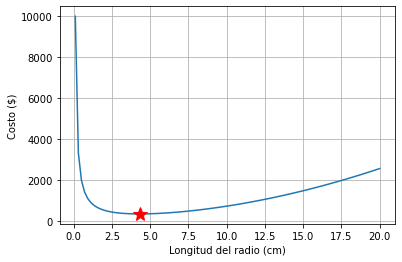

In [10]:
# Graficar
xnum=np.linspace(0.1,20,100)
ynum=S(xnum)
plt.plot(xnum,ynum)
plt.plot(c[0],S(c[0]),'*r',ms=15)
plt.xlabel('Longitud del radio (cm)')
plt.ylabel('Costo ($)')
plt.grid()

Dada la gráfica, se concluye que el punto crítico ($4.30,348.73$) corresponde en el mínimo global de la función a optimizar, por lo que se toma el valor encontrado del radio de la base como referencia para calcular la altura del envase, así como su costo.

In [11]:
h=500/(np.pi*c[0]**2) # Altura del envase cilíndrico
h

8.60254013828101

In [12]:
S(c[0])*0.01 # Costo del contenedor

3.48734205452888

De igual manera, utilizando las dimensiones anteriores, se verifica que se haya cumplido el requisito de volumen planteado en el problema:

In [13]:
V=h*np.pi*c[0]**2
V

500.000000000000

De esta manera, se concluye que el costo mínimo es de $\$3.49$, obtenido a partir de la fabricación de un contenedor cilíndrico de $348.73$ cm$^2$ de superficie total con dimensiones de $4.30$ cm de radio de la base y $8.60$ cm de altura.